<a href="https://colab.research.google.com/github/A01793509/Equipo38/blob/main/Actividad_6_Versi%C3%B3n_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import requests, zipfile
from io import BytesIO

#Librerias para el ejercicio 4, los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



import os
import pandas as pd
from google.colab import drive

# Considerar librería que añada archivos .asc o revisar si la pasndas tiene esa capacidad

#**Ejercicio-1.** 

In [ ]:
#Así, con base a datos históricos, el objetivo es predecir si una persona es clasificada como confiable a la
#asignación de un crédito, o no lo es. La variable de salida se llama “kredit”.


In [ ]:
#Primero montamos el drive para poder cargarel arhivo que tenemos guardado en el drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Este metodo es para poder leer directametne desde el zip y directamente de la URL donde esta la zip sin descargar nada
# importing necessary modules
print('Downloading started')

#Defining the zip file URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip'

# Split URL to get the file name
filename = url.split('/')[-1]

# Downloading the file by sending the request to the URL
#Para poder usar request necesitamos la libreria import requests, zipfile
from io import BytesIO

req = requests.get(url)
print('Downloading Completed')

# extracting the zip file contents
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('/content/sample_data/SouthGermanCredit')
df = pd.read_csv("/content/sample_data/SouthGermanCredit/SouthGermanCredit.asc",sep=' ')


In [ ]:
#Ruta del archivo a descargarse
#Usamos el mismo metodo read_csv, con el argumento s+, para identificar los espacios en vez de separacion por coma

#Para poder tener el archivo desde github sin tenerlo local, lo subimos a github en forma publica, y le damos click en el boton "raw" y nos da la dirección, recordar que tiene que estar publico
#df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SouthGermanCredit.asc', sep='\s+')
#df= pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-KarltonBotics/main/DataFrames/SouthGermanCredit.asc', sep='\s+')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [ ]:
#Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.
df.rename(columns = {
    'laufkont':'status',
    'laufzeit':'duration',
    'moral':'credit_history',
    'verw':'purpose',
    'hoehe':'amount',
    'sparkont':'savings',
    'beszeit':'employment_duration',
    'rate':'installment_rate',
    'famges':'personal_status_sex',
    'buerge':'other_debtors',
    'wohnzeit':'present_residence',
    'verm':'property',
    'alter':'age',
    'weitkred':'other_installment_plans',
    'wohn':'housing',
    'bishkred':'number_credits',
    'beruf':'job',
    'pers':'people_liable',
    'telef':'telephone',
    'gastarb':'foreign_worker',
    'kredit':'credit_risk'
}, inplace = True)
#El inplace true, nos permite hacer la mutación sobre el mismo dataframe, sin necesidad d ecrear otro nuevo
df.head()
df.head().sum()

status                        6
duration                     63
credit_history               18
purpose                      11
amount                     8982
savings                       6
employment_duration          15
installment_rate             15
personal_status_sex          13
other_debtors                 5
present_residence            16
property                      7
age                         157
other_installment_plans      13
housing                       6
number_credits                8
job                          12
people_liable                 8
telephone                     5
foreign_worker                8
credit_risk                   5
dtype: int64

In [ ]:
#Creación de espacio s dvalidación y prueba

#Determinamos las columnas que tenda el eje x, que en este caso son todas las demas columnas
X = df.iloc[:,0:20]
#Opcion alternativa al iloc es declaracion manual X=df["status","duration",...]

#Determinamos las columnas que contendra el eje y, que en este caso es solo la ultima columna
y = df.iloc[:, -1]

#creamos nuestros datos de validación con la función trains_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85, random_state=10)
X_train.head()
df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [ ]:
X_train.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.595294,20.462353,2.527059,2.851765,3216.104706,2.121176,3.384706,2.981176,2.690588,1.155294,2.852941,2.34000,35.603529,2.663529,1.924706,1.402353,2.900000,1.848235,1.403529,1.963529
std,1.260425,11.726531,1.077600,2.762129,2748.335186,1.590060,1.228442,1.114049,0.714666,0.491987,1.102849,1.04928,11.464257,0.716431,0.524074,0.570573,0.651627,0.359004,0.490894,0.187568
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1374.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.00000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2301.500000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.00000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,3959.000000,3.000000,5.000000,4.000000,3.000000,1.000000,4.000000,3.00000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,15945.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.00000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


#**Ejercicio-2.**

# Nueva sección

In [ ]:
None

#**Ejercicio-3.**

In [ ]:
from pandas.core.arrays import categorical
#Definir las variables categórica (categorical), ordinal, (discretized quantitative), numérica (quantitative) y binaria (binary).
#Entendemos que estas variables van a contener las columnas de cada uno de los tipos indicados. Es decir, en el df categorico irn las columnas con datos categoricos, etc.
#Para identificar el rubro, solamente vimos el sitio web del documento donde nos dice el tipo de cada columna
#Aun no estamos llamadolos del dataframe, unicamente pondremos los nombres de las columnas

#Revisar despues que todos tengamos bien identificadas las variables
#Columnas categoricas
df_cate = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing','telephone']
#columnas ordinales o discretas cuatntitativas=beszeit,rate,wohnzeit,bishkred,beruf, pers
df_ord = ['employment_duration','installment_rate','present_residence','property','number_credits','job']
#columnas numericas o cuantitativas = laufzeit,hoehe
df_num = ['duration','amount','age']
#columnas binarias= pers,telef,gastarb,kredit
df_bin = ['people_liable','telephone','foreign_worker']
#'credit_risk', esta es binaria es la ultima columna, que vamos a considerar como y, poque es nuestro resultado, o nuestra conclusion. Es la y, porque es lo que queremos saber.

In [ ]:
#Hacer un pipeline que Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso).
#Antes de cualquier imputaci[on hacemos una limpieza de nuestro data set.
#Revisamos datos nulos
X_train.isnull().sum()
#Estamos limpios por defecto
#De alguna foma, sabemos que solo usaremos X_train, por lo que no nos preocupamos por el Y?train ni nada de eso

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
dtype: int64

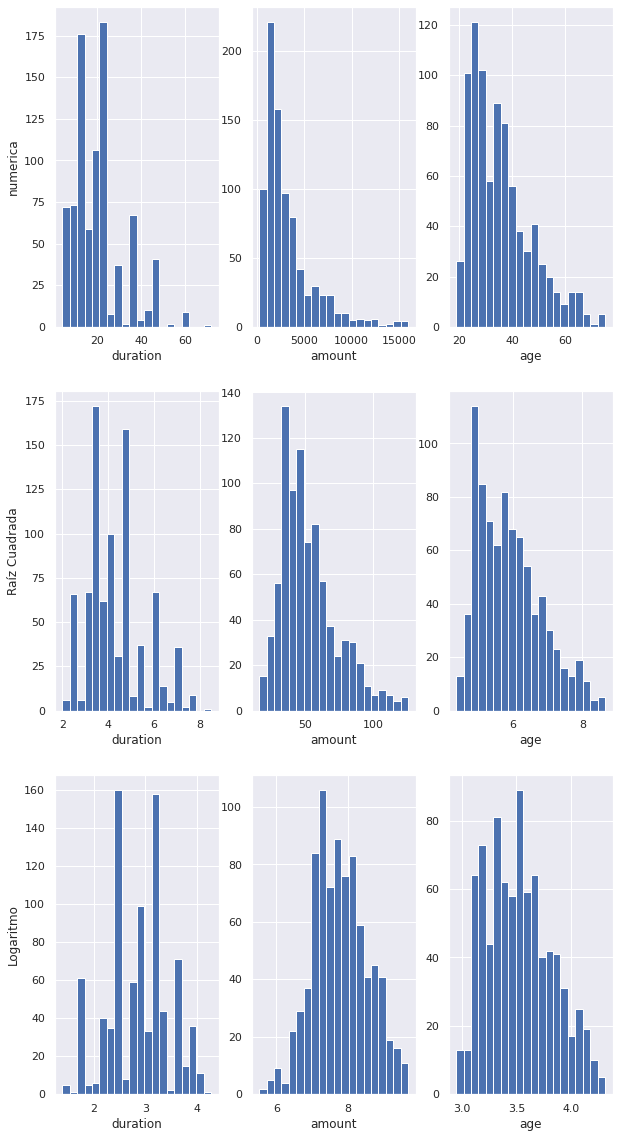

In [ ]:
################Eta parte no es del ejercicio, es solamente un ejercicio personal para ver cual es el mejor metodo de centralizacin de datos
sns.set(rc={'figure.figsize':(10,20)}) #tama;o 20 en x y 20 en y
#Numerica
k=0
fig, axes = plt.subplots(3, 3)   
for k in range(0,3):  
  plt.subplot(3,3,k+1) 

  Transf0 = X_train[df_num].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(df_num[k])
  if k==0:
    plt.ylabel('numerica')
  
  plt.subplot(3,3,k+4)    
  Transf1 = np.sqrt(Transf0)       #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
  plt.hist(Transf1, bins=20)                      #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
  plt.xlabel(df_num[k])
  if k==0:
    plt.ylabel('Raíz Cuadrada')

  plt.subplot(3,3,k+7)    
  Transf2 = np.log(Transf0)       #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
  plt.hist(Transf2, bins=20)                      #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
  plt.xlabel(df_num[k])
  if k==0:
    plt.ylabel('Logaritmo')

#De estas graficas, nadamas seleccionamos la que para nosotros esta mas bonita en cuanto a dispersion de datos, para poder trabajar con ellos. Yo me enamore de la ultima

In [ ]:
#3b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica unatransformación que escale a todas ellas en un rango equiparable.
#El metodo equiparable es el maxmin escaler

#Ahora si hacemos la imputacion, que significa sustituir algun dato nulo o valores atipicos, por lo que se procede a 
#Una justificacion puede ser que no hay imputaciones porque no hay datos nulos, o si queremos poner la media, mediana, etc.
#Antes de pasar al 3b, hacemos el pipeline de cada tipo de variable, recomendablemente, aunque tambien se puede hacer directo a la hora de la hora, pero eso lleva en cada modelo tener que transdormar nuestros tipos de variables
#Recordemos importar la libreria pipeline
#df_num_pip = Pipeline(steps = [('impMean', SimpleImputer(strategy='median')),  
#                                        ('scalar', MinMaxScaler(feature_range=(1,2))),
#                                        ('sqrt', FunctionTransformer(np.log))])  
#num_pipeline_nombres = numerica
#Para nuestro pipeline, seleccionamos el escalamiento, minmax, para evitar que nos
#Tambien debemos de definir si vamos a tratar nuestros datos normales,o si les vamos a hacer alguna transformacion para acampanarlos osea acercarlos a la media, pero eso es muy raro para mi.
#numericas = Pipeline(steps = [("imputer", SimpleImputer(strategy='mean')),("scaler", MinMaxScaler())])
#Esta parte no es obligatoria, pero es como de estilo y mejora ('sqrt', FunctionTransformer(np.log)), es para centrar los datos la campanita.
#En esta parte el log, lo observamos en el ejercicio de las graficas de arriba
df_num_pip = Pipeline(steps = [('scalar', MinMaxScaler(feature_range=(1,2))),('sqrt', FunctionTransformer(np.log))])
#Ahora definimos una variable, para que el modelo sepa a que columnas o datos le vamos a aplicar el pipeline definido
columnas_a_aplicar_df_num_pip = df_num 

#Recordemos que las categoricas no llevan la misma normalizacion, osea no podemos poner en un rango un diccionario de datos.
#En este caso la imputacion a las categoricas es la moda, 'most_frequent' lo que significa que pondra el numero de moda sin afectar su categoricidad.
#Aqui nadamas investigamos que es el la transformación One-Hot encoding, indicado
df_cate_pip = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(drop='first'))])
columnas_a_aplicar_df_num_cate = df_cate
#A las ordinales nos les vamos a hacer nada porque el profe dijo, pero de todos modos hacemos su pipeline
#df_ord_pip = Pipeline(steps = [('scalar', MinMaxScaler(feature_range=(1,2))),('sqrt', FunctionTransformer(np.log))])
#Recordemos que el pipeline para las binarias es exactamente el mismo de las categoricas
df_bin_pip = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(drop='first'))])
columnas_a_aplicar_df_nbin_pip = df_bin

#Nota de lo que hace el One Hot. Agarra un dataframe de 1 dimension con varios valores, y hace columnas para cada tipo de valor, y en vez de  de tenener valores dentro, solo les pone 1 y 0, a cada columna que contiene el valor
# el drop firs, borra la columna original con los valores y nos deja las nuevas columnas con ceros y unos
# ejemplo=[rojo, verde, rojo, azul, rojo]
#Aplicamos el one hot y nos queda rojo=[1,0,1,0,1], verde=[0,1,0,0,0], azul=[0,0,0,1,0]

#Recordemos que solo son 3 pipelines porque la instrucción dice que no hagamos nada con las ordinales: Por el momento dejar las variables ordinales sintransformar.
#Imputamos aunque no tengamos datos vacios, por que somos finos, y en caso de futuros datos ingresados, pues nuestro pipeline, va a solucionar antes de que llegue el caos.

In [ ]:
#Pasamos al 3.c
#Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.
#Aplicar tranformacion que escale 
#Definimos nuestra varia de tranformación de columnas, unicamente asignando una etiqueta al pipeline, y llamando cada pipeline
#Col_Trans = ColumnTransformer(transformers=[('etiqueta', pipeline,datos donde se aplica el pipeline)
Col_Trans = ColumnTransformer(transformers=[('numericas', df_num_pip,columnas_a_aplicar_df_num_pip), ('categoricas', df_cate_pip, columnas_a_aplicar_df_num_cate), 
                                                     ('binarias', df_bin_pip, columnas_a_aplicar_df_nbin_pip)], remainder='passthrough')

#Esta parte no se pide en el ejercicio aun, pero lo usamos para observar las trasnformaciones y analizar lo que deseemos
X_train_fit = Col_Trans.fit(X_train)
pd.DataFrame(X_train_fit.transform(X_train))

#Vamos a ver esta matriz  que ya tiene mas columnas, porque ya aplica los pipelines y los OneHot son los que añaden columnas

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.111226,0.047105,0.052186,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3.0,4.0,1.0,1.0,1.0,3.0
1,0.257829,0.091102,0.085522,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,4.0,1.0,2.0,1.0,2.0
2,0.111226,0.034135,0.474458,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,4.0,2.0,1.0,3.0
3,0.385662,0.143453,0.440556,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3.0,4.0,4.0,4.0,1.0,3.0
4,0.385662,0.406972,0.179341,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0.084557,0.082339,0.318454,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,3.0,2.0,4.0,1.0,2.0
846,0.111226,0.157649,0.133531,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,4.0,2.0,1.0,1.0,1.0,3.0
847,0.257829,0.122931,0.381368,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0
848,0.257829,0.269421,0.405465,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,2.0,3.0,3.0,4.0,3.0,3.0


#**Ejercicio-4.**

In [ ]:
#Tenemos que hacer 3 cosas_ Regresión Logística, Árbol de Decisión y Bosque Aleatorio
#entrenamiento de los tres de manera conjunta usando un ciclo FOR.
#Recuerdaaplicar las transformaciones que definiste en tu Pipeline.

In [ ]:
#Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su
#hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del
#desempeño de dicha función “learning_curve()”.

In [ ]:
#Los modelos los copiamos de la actividad 3 de IA, de regresion logistica
#En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision,
#recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes
#definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn.
#Sin embargo, sí puedes usar la información regresada por el método confusion_matrix()
#de scikit-learn para definir las métricas).



def get_models():
  #Creamos dos listas para ir metiendo los modelos
  modelos = list()
  nombres = list()

#Todas quedan con los parametros originales, por eso los parentesis de cada funcion llamada estan en blanco

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  #RD - Ranfom Forest
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  
  return modelos, nombres

In [ ]:
#Definimos funciones especificas

#Estos parametros los usamos para auxilio en comparaciones, pero no son solicitados por el maestro
def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  return precision

def mi_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp/(tp+fn)
  return recall

#El unico parametro solicitado por el maestro es  el f score

def mi_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  f1score = (2*tp)/((2*tp)+fp+fn)
  return f1score

def mi_gmean(yreal, ypred):

     tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
     recall = tp / (tp + fn)
     precision = tp / (tp + fp)
     gmean=np.sqrt(recall*precision)
     return gmean

In [ ]:
#Esta parte la vamos analizando de los ejercicios del profesor, en la actividad 5 donde llamavamos el recall y las funciones anteriormente descritas

#Esta parte es hasta la 4 c, deonde hacemos la validación cruzada

modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):
   
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  pipeline = Pipeline(steps=[('ct',Col_Trans),('m',modelos[i])])

  mismetricas = {
      "accuracy": make_scorer(mi_accuracy),
      "precision": make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)
  }

  resultadosOU = cross_validate(pipeline, X_train, y_train, scoring=mismetricas, cv=kfold)

  resultados.append(resultadosOU)
  
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']), 
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1score']),
                                                                          np.std(resultadosOU['test_f1score']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean'])
                                                                          ))

LR:
mean Accuracy: 0.759 (0.0504)
mean Precision: 0.796 (0.0399)
mean Recall: 0.890 (0.0576)
mean F1score: 0.839 (0.0348)
Gmean: 0.841 (0.0350)

DT:
mean Accuracy: 0.686 (0.0651)
mean Precision: 0.788 (0.0492)
mean Recall: 0.766 (0.0813)
mean F1score: 0.774 (0.0528)
Gmean: 0.775 (0.0522)

RF:
mean Accuracy: 0.763 (0.0488)
mean Precision: 0.785 (0.0424)
mean Recall: 0.921 (0.0420)
mean F1score: 0.847 (0.0307)
Gmean: 0.850 (0.0305)



#**Ejercicio-5.**

In [ ]:
None

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**